In [3]:
import gravis as gv
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib import figure, text

In [4]:
#extract edges and nodes from the data/got_edges.csv file containing node1, node2, weight
def extract_edges_nodes_csv(file):
    edges = []
    nodes = []
    with open(file, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            edges.append((line[0], line[1], float(line[2])))
            nodes.append(line[0])
            nodes.append(line[1])
    return edges, list(set(nodes))

def draw_graph(G: nx.Graph, node_color=None):
    pos = nx.nx_agraph.graphviz_layout(G)
    plt.figure(figsize=(16, 16))
    nx.draw_networkx_nodes(G, pos, node_size=8, node_color=node_color)
    nx.draw_networkx_edges(G, pos, width=0.75)
    plt.show()
    

In [5]:
got_edges, got_nodes = extract_edges_nodes_csv('data/got-edges.csv')

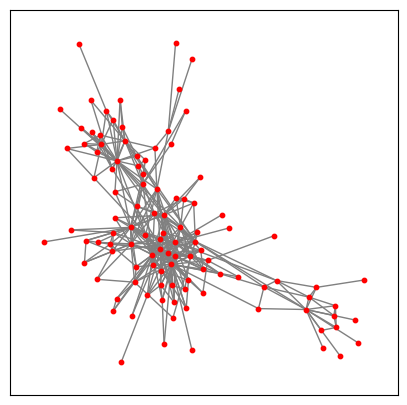

In [6]:
got_network = nx.Graph()
got_network.add_weighted_edges_from(got_edges)
#plot the graph
plt.figure(figsize=(5,5))
nx.draw_networkx(got_network, node_size=10, node_color='red', edge_color='grey', with_labels=False)

In [7]:
#basic graph info
print('Number of nodes: {}'.format(got_network.number_of_nodes()))
print('Number of edges: {}'.format(got_network.number_of_edges()))
print('Number of connected components: {}'.format(nx.number_connected_components(got_network)))
print('Average clustering coefficient: {}'.format(nx.average_clustering(got_network)))
print('Average shortest path length: {}'.format(nx.average_shortest_path_length(got_network) if nx.is_connected(got_network) else 'Not connected'))
print('Diameter: {}'.format(nx.diameter(got_network) if nx.is_connected(got_network) else 'Not connected'))
print('Density: {}'.format(nx.density(got_network)))
#edge attributes, so keys
edges = list(got_network.edges(data=True))
print('Edge attributes: {}'.format(edges[0]))


Number of nodes: 107
Number of edges: 352
Number of connected components: 1
Average clustering coefficient: 0.551443151559996
Average shortest path length: 2.903897019925939
Diameter: 6
Density: 0.062070181625815554
Edge attributes: ('Aemon', 'Grenn', {'weight': 5.0})


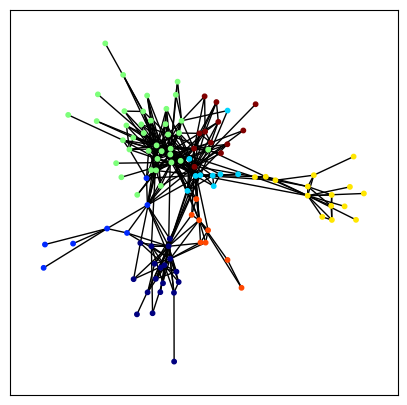

In [8]:
#determine communities
import community.community_louvain as louvain
partition = louvain.best_partition(got_network)
values = [partition.get(node) for node in got_network.nodes()]
#nodes takes color attribute

#plot the graph with communities
plt.figure(figsize=(5,5))
pos = nx.spring_layout(got_network)
nx.draw_networkx(got_network, cmap=plt.get_cmap('jet'), node_color=values, node_size=10, with_labels=False)

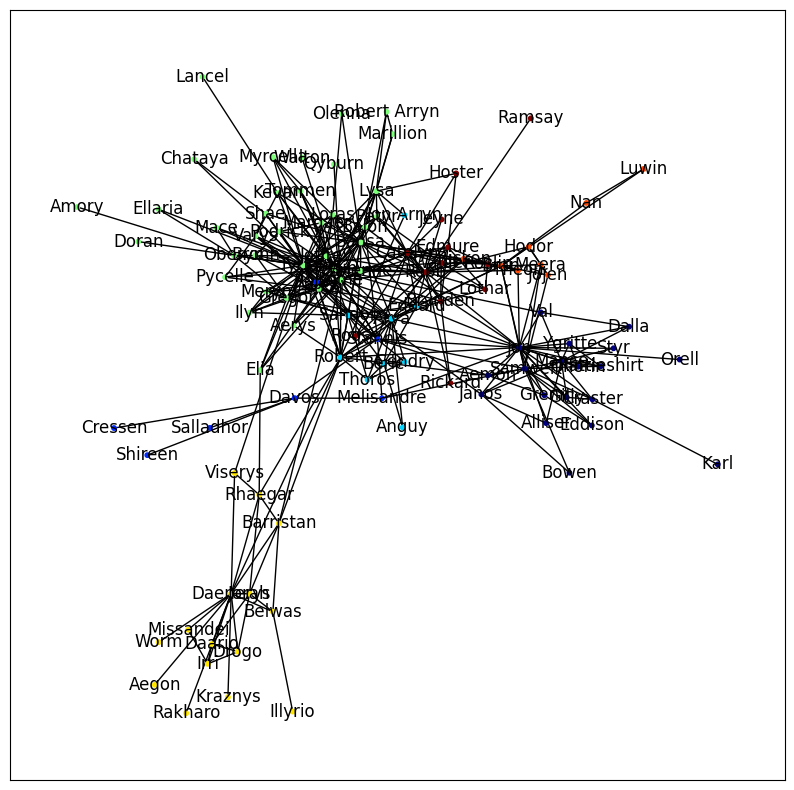

In [9]:
plt.figure(figsize=(10,10))
nx.draw_networkx(got_network, cmap=plt.get_cmap('jet'), node_color=values, node_size=10, with_labels=True)

In [10]:
#print the highest degree node of each community
from collections import defaultdict
communities = defaultdict(list)
for node, community in partition.items():
    communities[community].append(node)
for community in communities:
    print('Community {} has {} nodes'.format(community, len(communities[community])))
    print('Highest degree node: {} with {} neighboors'.format(max(communities[community], key=lambda x: got_network.degree(x)), got_network.degree(max(communities[community], key=lambda x: got_network.degree(x)))))
    

Community 0 has 19 nodes
Highest degree node: Jon with 26 neighboors
Community 3 has 37 nodes
Highest degree node: Tyrion with 36 neighboors
Community 2 has 9 nodes
Highest degree node: Arya with 19 neighboors
Community 5 has 8 nodes
Highest degree node: Bran with 14 neighboors
Community 6 has 12 nodes
Highest degree node: Robb with 25 neighboors
Community 4 has 15 nodes
Highest degree node: Daenerys with 14 neighboors
Community 1 has 7 nodes
Highest degree node: Stannis with 14 neighboors


In [11]:
custom_colors = [
    "blue",
    "red",
    "pink",
    "purple",
    "orange",
    "green",
    "brown"
]

community_to_color = {community_id: color for community_id, color in enumerate(custom_colors)}

Number of communities: 7


C:\Users\camil\AppData\Roaming\Python\Python311\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


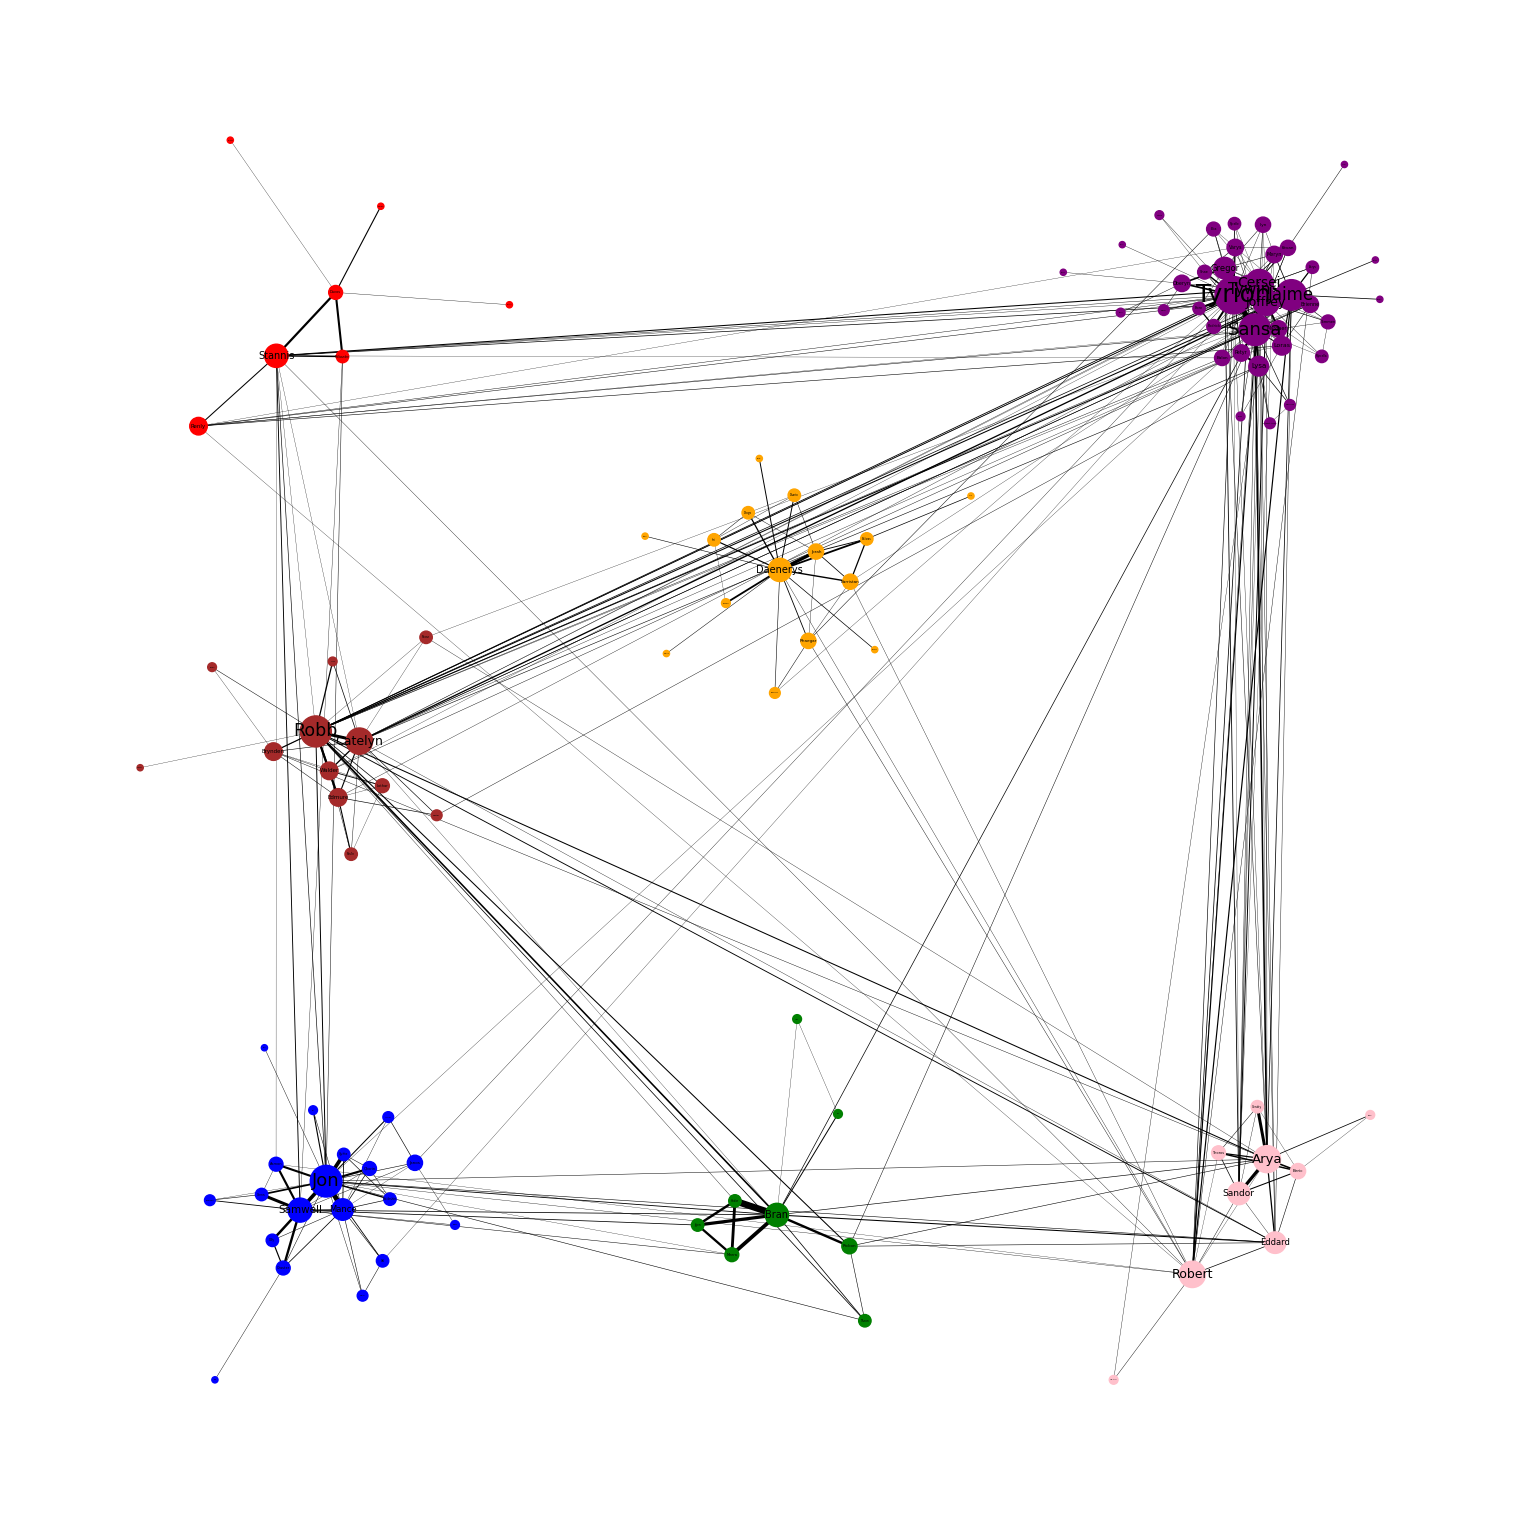

In [12]:
#plot the graph with communities and labels, with the size of the nodes proportional to the degree and the width of the edges proportional to the weight
plt.figure(figsize=(15,15))
degrees_dict = dict(got_network.degree)
edge_width = [(got_network[u][v]['weight']) / 20 for u, v in got_network.edges()]

# Number of communities
communities = len(set(partition.values()))
print('Number of communities: {}'.format(communities))

# Define community centers for each community
community_centers = [[0, 0], [0, 5], [5, 0], [5, 5], [2.5, 3.5], [2.5, 0], [0, 2.5], [5, 1.5]]
community_centers = [community_centers[i] * 1 for i in range(communities)]

pos = {}
communities_dict = {}
for i in range(communities):
    communities_dict[i] = []

for node in got_network.nodes():
    communities_dict[partition[node]].append(node)

for i in range(communities):
    subgraph = got_network.subgraph(communities_dict[i])
    pos.update(nx.spring_layout(subgraph, center=community_centers[i], scale=1, dim= 2))

node_colors = []
for node in got_network.nodes():
    for i in range(communities):
        if node in communities_dict[i]:
            node_colors.append(custom_colors[i])

#adjust edge length so that there are no nodes overlapping

nx.draw(got_network, pos=pos, cmap=plt.get_cmap('jet'), width=edge_width, node_color=node_colors, node_size = [v * 20 for v in degrees_dict.values()])
for node, (x, y) in pos.items():
    font_size = degrees_dict[node]
    plt.text(x, y, node, fontsize = font_size*0.5,ha='center', va='center') 
plt.show()


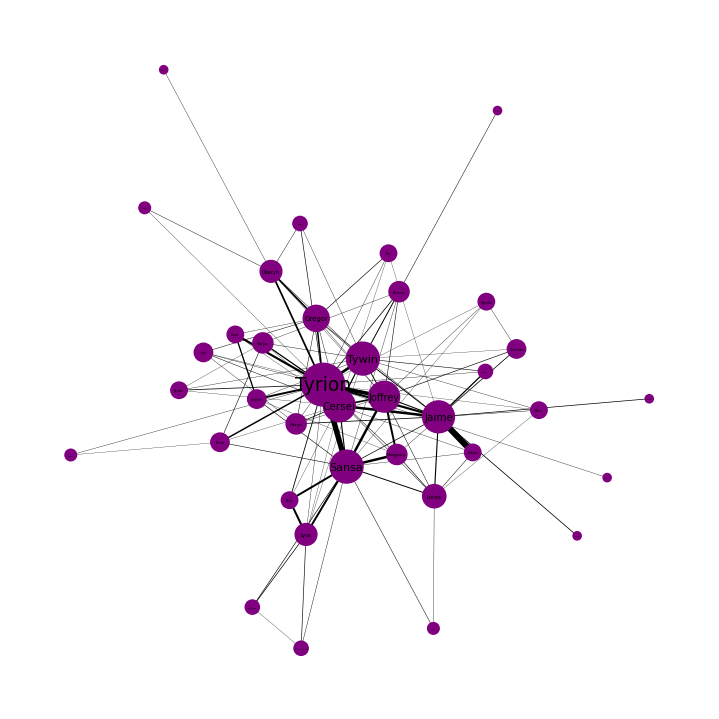

In [13]:
#plot Tyrion's community
#find Tyrion's community
for node, community in partition.items():
    if node == 'Tyrion':
        tyrion_community = community
        break
plt.figure(figsize=(7,7))
tyrion_subgraph = got_network.subgraph(communities_dict[tyrion_community])
tyrions_degrees = dict(tyrion_subgraph.degree)
tyrions_edge_width = [(tyrion_subgraph[u][v]['weight']) / 20 for u, v in tyrion_subgraph.edges()]
tyrions_pos = nx.spring_layout(tyrion_subgraph, center=community_centers[3], scale=7, dim= 2)
nx.draw(tyrion_subgraph, pos=tyrions_pos, cmap=plt.get_cmap('jet'), width=tyrions_edge_width, node_color=community_to_color[3], node_size = [v * 35 for v in tyrions_degrees.values()])
for node, (x, y) in tyrions_pos.items():
    font_size = tyrions_degrees[node]
    plt.text(x, y, node, fontsize = font_size*0.5,ha='center', va='center')
plt.show()


Wordcloud

In [14]:
from wordcloud import WordCloud
import math as m
 
def create_wordclouds_for_all_communities(partition, graph):
    unique = set(partition.values())

    count = len(unique)
    rows = m.ceil(m.sqrt(count))
    cols = m.ceil(count / rows)

    plt.figure(figsize=(5 * cols, 5 * rows))

    for comm_id in unique:
        comm_nodes = [
            n for n, c in partition.items() if c == comm_id
        ]

        word_data = {n: graph.degree(n) for n in comm_nodes}

        cloud = WordCloud(
            width=1600,
            height=800,
            background_color="white",
            color_func=lambda *args, **kwargs: custom_colors[comm_id],
        ).generate_from_frequencies(word_data)

        a = plt.subplot(rows, cols, comm_id + 1)
        a.imshow(cloud, interpolation="bilinear")
        a.set_title(f"Community {comm_id}", fontsize=20)
        a.axis("off")

    plt.tight_layout(h_pad=-30, w_pad=0)
    plt.show()

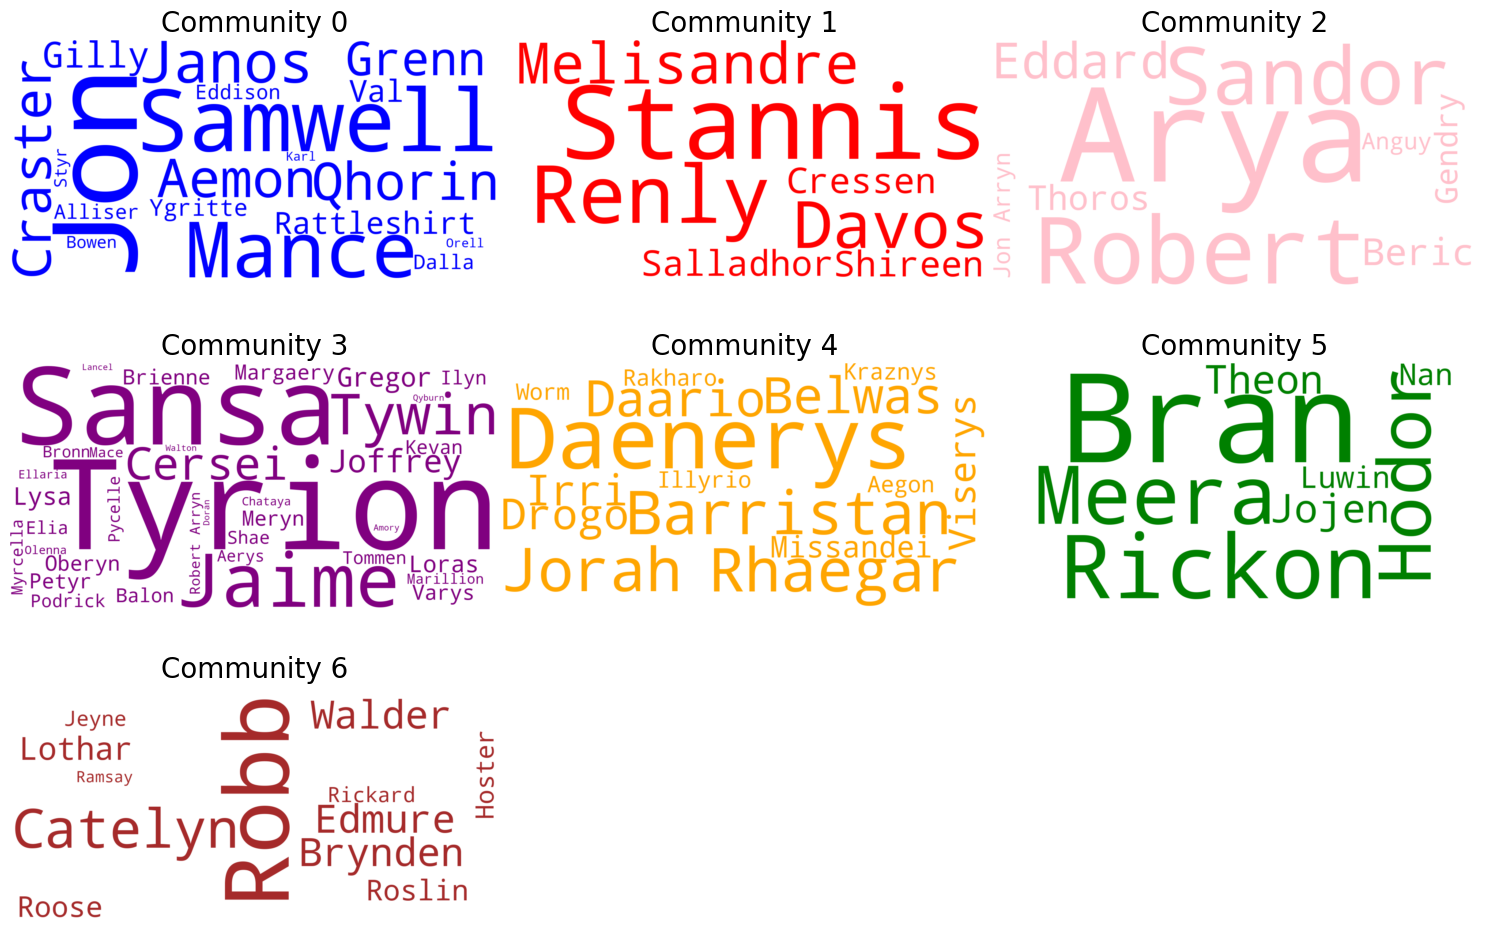

In [15]:
got_cloud = create_wordclouds_for_all_communities(partition, got_network)

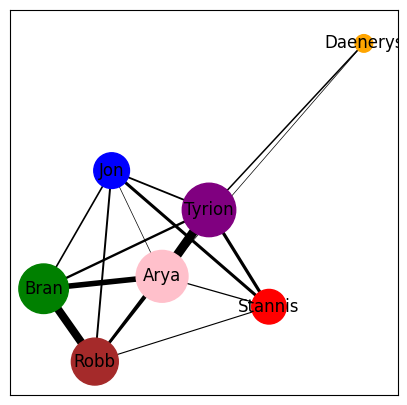

In [16]:
#graph of communities (each node is an entire community)
communities_graph = nx.Graph()
communities_graph.add_nodes_from(partition.values())
#set node labels to be the community's most important node
communities_graph_labels = {community: max(communities_dict[community], key=lambda x: got_network.degree(x)) for community in communities_dict}
nx.set_node_attributes(communities_graph, communities_graph_labels, 'label')
labels_communities = {node : communities_graph.nodes[node]['label'] for node in communities_graph.nodes()}
#add edges between communities
#find total weight of edges between communities
communities_edges = {}
for edge in got_edges:
    if partition[edge[0]] != partition[edge[1]]:
        if (partition[edge[0]], partition[edge[1]]) in communities_edges:
            communities_edges[(partition[edge[0]], partition[edge[1]])] += edge[2]
        else:
            communities_edges[(partition[edge[0]], partition[edge[1]])] = edge[2]
#add edges to the graph
communities_graph.add_weighted_edges_from([(edge[0], edge[1], communities_edges[edge]) for edge in communities_edges])
#plot the graph
node_colors_communities = [custom_colors[node] for node in communities_graph.nodes()]
plt.figure(figsize=(5,5))
#node size proportional to the total weight of edges of the node
node_size_communities = [communities_graph.degree(node, weight='weight') * 10 for node in communities_graph.nodes()]
edge_width_communities = [communities_graph[u][v]['weight']/10 for u, v in communities_graph.edges()]
pos = nx.spring_layout(communities_graph, scale=5, dim= 2)
nx.draw_networkx(communities_graph, pos=pos, labels = labels_communities ,node_size=node_size_communities, width=edge_width_communities, node_color=node_colors_communities, with_labels=True)
plt.show()  

In [17]:
print('Number of nodes: {}'.format(communities_graph.number_of_nodes()))
print('Number of edges: {}'.format(communities_graph.number_of_edges()))
print('Number of connected components: {}'.format(nx.number_connected_components(communities_graph)))
print('Average clustering coefficient: {}'.format(nx.average_clustering(communities_graph)))
print('Average shortest path length: {}'.format(nx.average_shortest_path_length(communities_graph) if nx.is_connected(communities_graph) else 'Not connected'))
print('Diameter: {}'.format(nx.diameter(communities_graph) if nx.is_connected(communities_graph) else 'Not connected'))
print('Density: {}'.format(nx.density(communities_graph)))

Number of nodes: 7
Number of edges: 16
Number of connected components: 1
Average clustering coefficient: 0.8761904761904763
Average shortest path length: 1.2380952380952381
Diameter: 2
Density: 0.7619047619047619


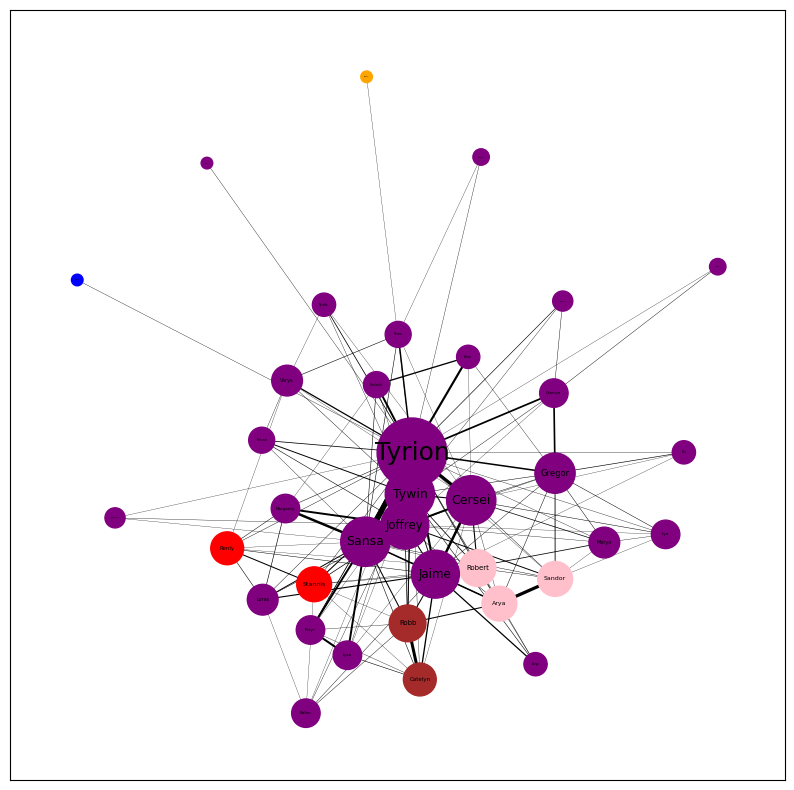

In [18]:
#ego network of tyrion
tyrion_ego = nx.ego_graph(got_network, 'Tyrion')
plt.figure(figsize=(10,10))
node_sizes_tyrion = [tyrion_ego.degree(node) * 70 for node in tyrion_ego.nodes()]
edge_width_tyrion = [tyrion_ego[u][v]['weight']/20 for u, v in tyrion_ego.edges()]
node_colors_tyrion = []
for node in tyrion_ego.nodes():
    for i  in range(communities):
        if node in communities_dict[i]:
            node_colors_tyrion.append(custom_colors[i])
pos = nx.spring_layout(tyrion_ego, scale=7, dim= 2)
nx.draw_networkx(tyrion_ego, pos = pos, node_size=node_sizes_tyrion, width=edge_width_tyrion, node_color=node_colors_tyrion, with_labels=False)
for node, (x, y) in pos.items():
    font_size = tyrion_ego.degree(node)
    plt.text(x, y, node, fontsize = font_size*0.5,ha='center', va='center')

In [19]:
#node list as csv
with open('data/got_nodes.csv', 'w') as f:
    for node in got_nodes:
        f.write(node + '\n')